In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit
from scipy import interpolate
import pickle
from bfunc import bfunc00,bfunc01,bfunc02,bfunc03s


In [3]:
samples=pd.read_csv('CIresults//list.csv',header=None)
samples

,0
0,Dor
1,N604H
2,N595
3,N346
4,CarC
5,CarB
6,CarR
7,N604O
8,OrionLH
9,HX


In [4]:
CI = {}

for i in range(len(samples)):
    pickle_in = open('CIresults//' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    CI[samples[0][i]] = df

SF = {}

for i in range(len(samples)):
    pickle_in = open('SFresults//' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    SF[samples[0][i]] = df
    

Results obtained using lmfit

In [5]:
for i in range(len(samples)):
    print(str(samples[0][i]) + ':',
          ' r0 = ' + str(np.round(CI[samples[0][i]]['resultCI'].params['r0'].value,4)) + ' pc,', 
          ' m = ' + str(np.round(CI[samples[0][i]]['resultCI'].params['m'].value,4)) + ',',
          ' sig2 = ' + str(np.round(CI[samples[0][i]]['resultCI'].params['sig2'].value,4)) + ' (km/s)^2',
          ' sig = ' + str(np.round(CI[samples[0][i]]['resultCI'].params['sig2'].value**0.5,4)) + ' km/s')

Dor:  r0 = 3.6167 pc,  m = 0.8942,  sig2 = 301.1711 (km/s)^2  sig = 17.3543 km/s
N604H:  r0 = 6.4295 pc,  m = 1.4722,  sig2 = 45.2234 (km/s)^2  sig = 6.7248 km/s
N595:  r0 = 7.5253 pc,  m = 1.3895,  sig2 = 40.302 (km/s)^2  sig = 6.3484 km/s
N346:  r0 = 1.7526 pc,  m = 0.7522,  sig2 = 37.4952 (km/s)^2  sig = 6.1233 km/s
CarC:  r0 = 0.5514 pc,  m = 1.2593,  sig2 = 15.5295 (km/s)^2  sig = 3.9408 km/s
CarB:  r0 = 1.1843 pc,  m = 0.8464,  sig2 = 73.1187 (km/s)^2  sig = 8.5509 km/s
CarR:  r0 = 0.8794 pc,  m = 1.2605,  sig2 = 38.6849 (km/s)^2  sig = 6.2197 km/s
N604O:  r0 = 5.4079 pc,  m = 2.0588,  sig2 = 20.6888 (km/s)^2  sig = 4.5485 km/s
OrionLH:  r0 = 0.817 pc,  m = 0.9253,  sig2 = 13.7171 (km/s)^2  sig = 3.7037 km/s
HX:  r0 = 3.2641 pc,  m = 1.1243,  sig2 = 13.1909 (km/s)^2  sig = 3.6319 km/s
M8:  r0 = 0.9703 pc,  m = 1.0882,  sig2 = 6.8675 (km/s)^2  sig = 2.6206 km/s
M8S:  r0 = 0.6211 pc,  m = 0.9446,  sig2 = 6.5262 (km/s)^2  sig = 2.5546 km/s
OrionS:  r0 = 0.0405 pc,  m = 1.1361,  sig2

Results obtained using a numpy interpolation method for r0, sigma as std of the radial velocity sample and m humanly fitted.

In [6]:
for i in range(len(samples)):
    print(str(samples[0][i]) + ':',
          ' r0 = ' + str(np.round(SF[samples[0][i]]['r0'],4)) + ' pc,', 
          ' m = ' + str(np.round(SF[samples[0][i]]['m'],4)) + ',',
          ' sig2 = ' + str(np.round(SF[samples[0][i]]['sig2'],4)) + ' (km/s)^2',
          ' sig = ' + str(np.round(SF[samples[0][i]]['sig2']**0.5,4)) + ' km/s')

Dor:  r0 = 2.6956 pc,  m = 1.2,  sig2 = 252.1136 (km/s)^2  sig = 15.8781 km/s
N604H:  r0 = 8.9133 pc,  m = 1.5,  sig2 = 54.6205 (km/s)^2  sig = 7.3906 km/s
N595:  r0 = 8.7804 pc,  m = 1.5,  sig2 = 44.1279 (km/s)^2  sig = 6.6429 km/s
N346:  r0 = 1.3592 pc,  m = 1.2,  sig2 = 31.8791 (km/s)^2  sig = 5.6462 km/s
CarC:  r0 = 0.4911 pc,  m = 0.9,  sig2 = 17.8872 (km/s)^2  sig = 4.2293 km/s
CarB:  r0 = 1.1676 pc,  m = 1.0,  sig2 = 64.1908 (km/s)^2  sig = 8.0119 km/s
CarR:  r0 = 0.5429 pc,  m = 0.8,  sig2 = 50.1867 (km/s)^2  sig = 7.0843 km/s
N604O:  r0 = 8.1846 pc,  m = 1.5,  sig2 = 35.2995 (km/s)^2  sig = 5.9413 km/s
OrionLH:  r0 = 0.4376 pc,  m = 1.1,  sig2 = 10.4338 (km/s)^2  sig = 3.2301 km/s
HX:  r0 = 3.5817 pc,  m = 1.5,  sig2 = 12.896 (km/s)^2  sig = 3.5911 km/s
M8:  r0 = 1.0324 pc,  m = 1.0,  sig2 = 7.5264 (km/s)^2  sig = 2.7434 km/s
M8S:  r0 = 0.7454 pc,  m = 1.0,  sig2 = 6.7113 (km/s)^2  sig = 2.5906 km/s
OrionS:  r0 = 0.0431 pc,  m = 1.5,  sig2 = 9.3755 (km/s)^2  sig = 3.0619 km/s


(54.62045699825188, 8.913251254833815, 1.5, 1.5563445559185105, 0.001)

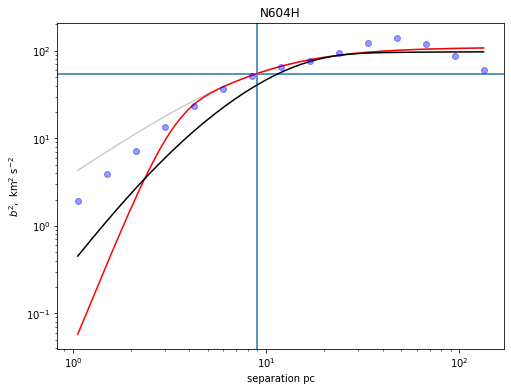

In [7]:
i=1
s = SF[samples[0][i]]['s']
b2 = SF[samples[0][i]]['b2']
sig2 = SF[samples[0][i]]['sig2']
r0 = SF[samples[0][i]]['r0']
m = SF[samples[0][i]]['m']
s0 = SF[samples[0][i]]['s0']
noise = 0.001

rgrid = np.logspace(
    np.log10(SF[samples[0][i]]['s'][0]),
    np.log10(SF[samples[0][i]]['s'][-1]),
    200
)

fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, fmt='o', alpha=0.4,color="blue")


ax.axhline(SF[samples[0][i]]['sig2'], ls='-')
ax.axvline(SF[samples[0][i]]['r0'], ls='-')

#ax.axhline(2*SF[samples[0][i]]['sig2'], ls=':')
#ax.axvline(r2, ls=':')

#ax.axhline(sig, ls=':')
#ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, s0, noise), color="red")
ax.plot(rgrid, bfunc03s(rgrid, r0, sig2, m, s0, noise), color="black")

ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$',
       title=samples[0][i]
)
None


sig2,r0,m,s0, noise

Orion

In [8]:
SF['OrionLH']['sig2']

10.433847745911214

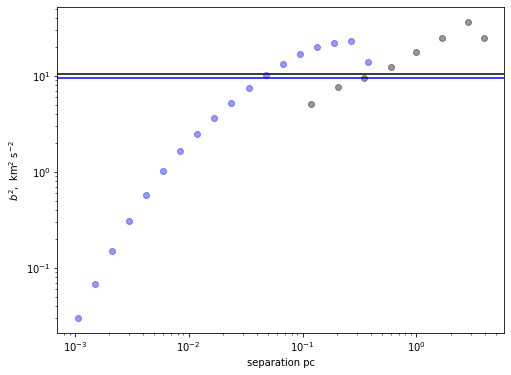

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(SF['OrionLH']['s'],SF['OrionLH']['b2'], fmt='o', alpha=0.4,color="black")
ax.errorbar(SF['OrionS']['s'],SF['OrionS']['b2'], fmt='o', alpha=0.4,color="blue")

ax.axhline(SF['OrionLH']['sig2'], ls='-',color="black")
ax.axhline(SF['OrionS']['sig2'], ls='-',color="blue")


ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

Car

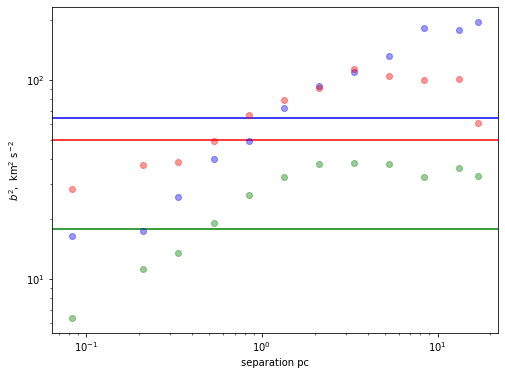

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(SF['CarC']['s'],SF['CarC']['b2'], fmt='o', alpha=0.4,color="green")
ax.errorbar(SF['CarB']['s'],SF['CarB']['b2'], fmt='o', alpha=0.4,color="blue")
ax.errorbar(SF['CarR']['s'],SF['CarR']['b2'], fmt='o', alpha=0.4,color="red")

ax.axhline(SF['CarC']['sig2'], ls='-',color="green")
ax.axhline(SF['CarB']['sig2'], ls='-',color="blue")
ax.axhline(SF['CarR']['sig2'], ls='-',color="red")

ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

M8

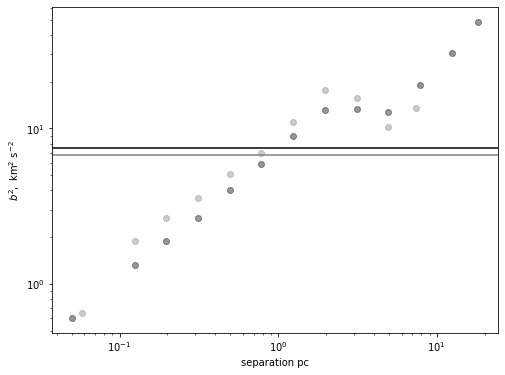

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(SF['M8']['s'],SF['M8']['b2'], fmt='o', alpha=0.4,color="black")
ax.errorbar(SF['M8S']['s'],SF['M8S']['b2'], fmt='o', alpha=0.4,color="gray")

ax.axhline(SF['M8']['sig2'], ls='-',color="black")
ax.axhline(SF['M8S']['sig2'], ls='-',color="gray")

ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

All regions

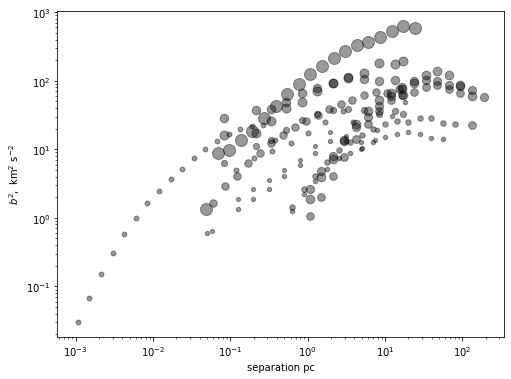

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(samples)):
    ax.errorbar(SF[samples[0][i]]['s'],SF[samples[0][i]]['b2'], fmt='o', alpha=0.4,color="black", markersize=5*np.log10(SF[samples[0][i]]['sig2']))

ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [13]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 4.8882036209106445 seconds ---
